In [1]:
%pylab inline
import numpy as np

import astropy.constants as c
import astropy.units as u

from scipy import integrate

matplotlib.rcParams['font.family'] = 'serif'
matplotlib.rcParams['font.family'] = 'Times New Roman'

pylab.rc("axes", linewidth=2.0)
pylab.rc("lines", markeredgewidth=4)
pylab.rc('xtick', labelsize = 20)
pylab.rc('ytick', labelsize = 20)


Populating the interactive namespace from numpy and matplotlib


In [35]:
m1 = 9.1 * u.Msun
m2 = 8.2 * u.Msun
P0 = 1. * u.day
ecc0 = 0.6

###  solve the coupled ODE from Peters 1964

def dXdt(X, t=0):
    '''
    X = [a, e]
    '''
    #print(X)
    xi = (c.G**3 * m1 * m2 * (m1 + m2) / c.c**5).si
    return np.array([
            (-64. * xi / (5. * X[0]**3 * (1. - X[1]**2)**(7./2.)) * (1. + 73./24. * X[1]**2 + 37./96. * X[1]**4)).si.value,
            (-304. * xi * X[1] / (X[0]**4 * (1. - X[1]**2)**(5./2.)) * (1. + 121./304. * X[1]**2)).si.value
        ])

In [36]:
# initial separation from initial period
a0 = ((c.G * (m1 + m2) * P0**2 / (4. * np.pi**2))**(1./3.)).si.value

In [37]:
tmax = (1.5e9 * u.yr).si.value

tt = np.logspace(-1, np.log10(tmax), 3000)

ICs = array([a0, ecc0])

X, infodict = integrate.odeint(dXdt, ICs, tt, full_output=True)

infodict['message']

/Users/MarcusLower/anaconda3/lib/python3.6/site-packages/scipy/integrate/odepack.py:218: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


'Excess work done on this call (perhaps wrong Dfun type).'

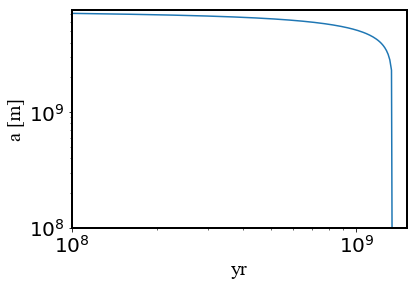

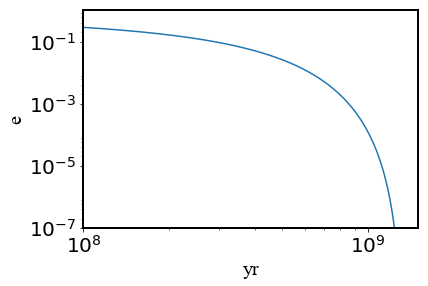

(0, 1)

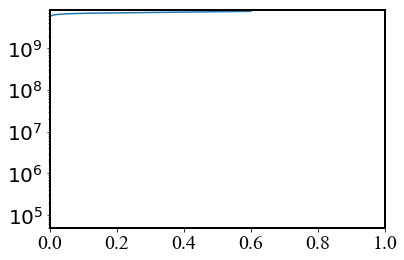

In [38]:
tyr = (tt * u.s).to('yr').value

plt.loglog(tyr, X[:, 0])
plt.xlim(1e8, max(tyr))
plt.ylim(1e8, a0)
plt.xlabel('yr', size=20)
plt.ylabel('a [m]', size=20)
plt.savefig('sep.png')

plt.show()
plt.loglog(tyr, X[:, 1])
plt.xlim(1e8, max(tyr))
plt.xlabel('yr', size=20)
plt.ylabel('e', size=20)
plt.ylim(1e-7, 1)
plt.savefig('ecc.png')

plt.show()
plt.semilogy(X[:,1],X[:,0])
plt.ylim(5e4,8e9)
plt.xlim(0,1)